In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

/Users/pcordero/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("../data/raw-music-data.csv", usecols=['artist_name', 'track_name', 'release_date', 'genre', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'])

df

,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,frankie laine,i believe,1950,pop,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,johnnie ray,cry,1950,pop,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,pérez prado,patricia,1950,pop,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,nine,whutcha want?,2019,hip hop,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,will smith,switch,2019,hip hop,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [21]:
# Gets information about the dataframe and it's memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28372 non-null  object 
 1   track_name                28372 non-null  object 
 2   release_date              28372 non-null  int64  
 3   genre                     28372 non-null  object 
 4   dating                    28372 non-null  float64
 5   violence                  28372 non-null  float64
 6   world/life                28372 non-null  float64
 7   night/time                28372 non-null  float64
 8   shake the audience        28372 non-null  float64
 9   family/gospel             28372 non-null  float64
 10  romantic                  28372 non-null  float64
 11  communication             28372 non-null  float64
 12  obscene                   28372 non-null  float64
 13  music                     28372 non-null  float64
 14  moveme

In [22]:
# Displays the total rows and columns of the dataframe.
df.shape

(28372, 28)

In [23]:
#Prints the first five columns of the dataframe
df.head(5)

,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [24]:
# An overview of all the columns
df.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'dating',
       'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'],
      dtype='object')

In [25]:
#Prints the first five columns of the dataframe
df.head()

,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [26]:
#Displays the data types for all columns
df.dtypes

artist_name                  object
track_name                   object
release_date                  int64
genre                        object
dating                      float64
violence                    float64
world/life                  float64
night/time                  float64
shake the audience          float64
family/gospel               float64
romantic                    float64
communication               float64
obscene                     float64
music                       float64
movement/places             float64
light/visual perceptions    float64
family/spiritual            float64
like/girls                  float64
sadness                     float64
feelings                    float64
danceability                float64
loudness                    float64
acousticness                float64
instrumentalness            float64
valence                     float64
energy                      float64
topic                        object
age                         

In [27]:
# Displays the unique values of all series
df.nunique()

artist_name                  5426
track_name                  23689
release_date                   70
genre                           7
dating                      27918
violence                    28189
world/life                  28195
night/time                  28169
shake the audience          27161
family/gospel               28050
romantic                    27892
communication               28192
obscene                     28203
music                       28177
movement/places             28200
light/visual perceptions    28182
family/spiritual            27932
like/girls                  28094
sadness                     28191
feelings                    27707
danceability                  859
loudness                    13066
acousticness                 3786
instrumentalness             4939
valence                      1295
energy                       1348
topic                           8
age                            70
dtype: int64

In [28]:
#Gives an estimate of all columns
df.describe()

,release_date,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,1990.236888,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,0.076680,0.097168,0.060047,0.047401,0.049005,0.024150,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,18.487463,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,0.109538,0.181303,0.123329,0.091547,0.089554,0.051025,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,1950.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,1975.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,1991.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,2007.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,0.132136,0.088765,0.055101,0.054258,0.064296,0.025498,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,2019.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [29]:
# Using the sort_values function to check the top 10 'topic' column by descending order.
df.sort_values(by="topic", ascending=False).head(10)

,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
21380,jimmy cliff,where there is love,1982,reggae,0.002392,0.002392,0.419754,0.254979,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.068136,0.221246,0.002392,0.567854,0.509756,0.064557,0.000002,0.202391,0.350330,world/life,0.542857
7205,hank thompson,after all the things i've done,1958,country,0.001880,0.001880,0.344827,0.001880,0.001880,0.037981,0.041021,0.291943,0.001880,0.001880,0.001880,0.158423,0.001880,0.001880,0.101368,0.001880,0.451966,0.479040,0.884538,0.000093,0.275556,0.136109,world/life,0.885714
20894,devin townsend,spirits will collide,2019,jazz,0.001144,0.038496,0.500536,0.001144,0.001144,0.001144,0.027425,0.001144,0.001144,0.001144,0.001144,0.119074,0.081453,0.001144,0.218142,0.001144,0.313333,0.655950,0.002730,0.000123,0.320899,0.675666,world/life,0.014286
7242,stonewall jackson,let's call it a day,1959,country,0.002632,0.002632,0.552514,0.002632,0.002632,0.002632,0.002632,0.324545,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.544027,0.680871,0.563253,0.000000,0.624897,0.328307,world/life,0.871429
20904,thank you scientist,geronimo,2019,jazz,0.000741,0.123172,0.408149,0.072051,0.063639,0.000741,0.000741,0.000741,0.000741,0.000741,0.000741,0.081216,0.000741,0.000741,0.227661,0.000741,0.326329,0.804297,0.010441,0.082186,0.174567,0.908906,world/life,0.014286
20906,vera lynn,besame mucho (kiss me),2019,jazz,0.001754,0.001754,0.668452,0.090972,0.001754,0.001754,0.066514,0.081949,0.001754,0.040237,0.001754,0.001754,0.001754,0.001754,0.001754,0.029069,0.218022,0.587006,0.823293,0.000005,0.174567,0.248225,world/life,0.014286
20910,jordan rakei,you & me,2019,jazz,0.155153,0.000975,0.418290,0.134104,0.000975,0.000975,0.000975,0.144267,0.000975,0.000975,0.000975,0.000975,0.000975,0.000975,0.000975,0.057153,0.707571,0.692947,0.307228,0.000898,0.301319,0.511496,world/life,0.014286
20911,taylor mcferrin,i would still,2019,jazz,0.001949,0.001949,0.535982,0.001949,0.071914,0.001949,0.001949,0.244090,0.001949,0.001949,0.001949,0.001949,0.064649,0.001949,0.001949,0.028576,0.316582,0.686357,0.147590,0.000228,0.135408,0.650640,world/life,0.014286
7229,don gibson,i can't stop lovin' you,1958,country,0.001385,0.001385,0.331881,0.158394,0.001385,0.001385,0.063057,0.001385,0.001385,0.097032,0.001385,0.001385,0.001385,0.001385,0.141036,0.001385,0.470378,0.617850,0.829317,0.000001,0.416735,0.358338,world/life,0.885714
20928,axian,sunday morning,2019,jazz,0.000774,0.057788,0.488493,0.000774,0.000774,0.000774,0.000774,0.000774,0.000774,0.120890,0.152869,0.091981,0.024981,0.000774,0.000774,0.000774,0.659916,0.637233,0.928715,0.776316,0.204452,0.235211,world/life,0.014286


In [12]:
# sns.heatmap(df.corr(), annot=True)
# plt.rcParams['figure.figsize'] = (20.7)
# plt.show()

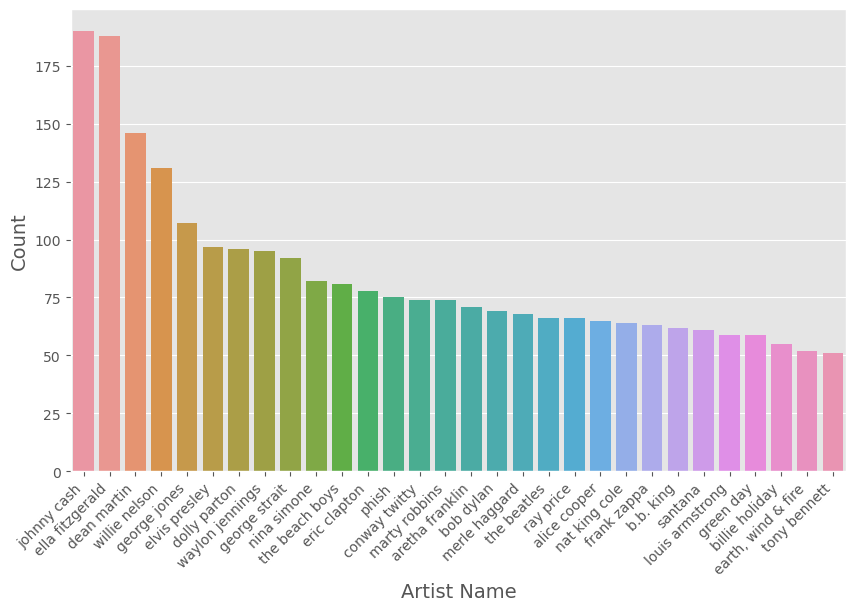

In [30]:
# 
artists = df['artist_name'].value_counts().head(30)
artists.reset_index()
plt.figure(figsize=[10, 6])
sns.barplot(x=artists.index, y=artists.values)
plt.xlabel('Artist Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0, 0.5, 'Count')

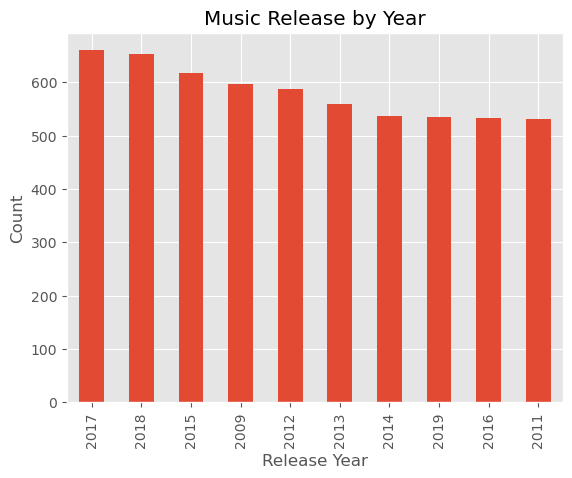

In [46]:
#Created a Histograph to display the 'release_date' column to view the music by year.

ry_graph = df['release_date'].value_counts() \
    .head(10) \
    .plot(kind='bar', title="Music Release by Year")
ry_graph.set_xlabel('Release Year')
ry_graph.set_ylabel('Count')

In [ ]:
df

/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Music Release by Year')

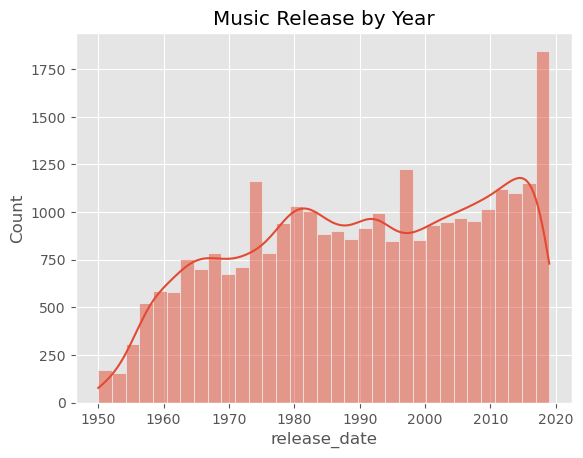

In [48]:
#Using a histograph to display the 'release_date' column to view the music by year.
# sns.histplot(data=df, x="release_date")
# release_date = df['release_date'].value_counts().head(30)
# sns.displot(data=df, x="release_date", kde=True)
sns.histplot(data=df, x="release_date", kde=True).set_title("Music Release by Year")



/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Music Category by Genre')

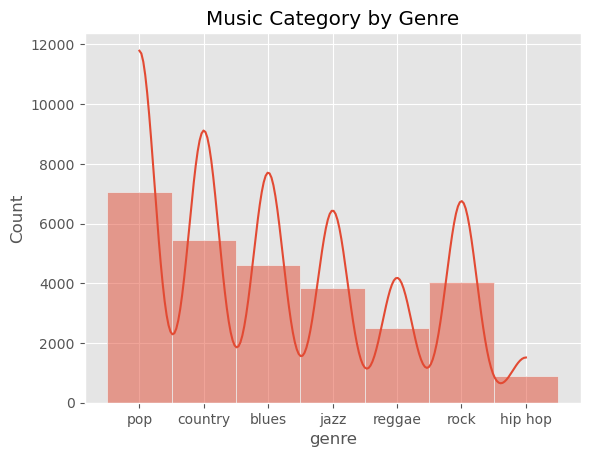

In [53]:
#Using a histograph to display the 'genre' column to view the music by genre.

sns.histplot(data=df, x="genre", kde=True).set_title("Music Category by Genre")

/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Music Category by Age')

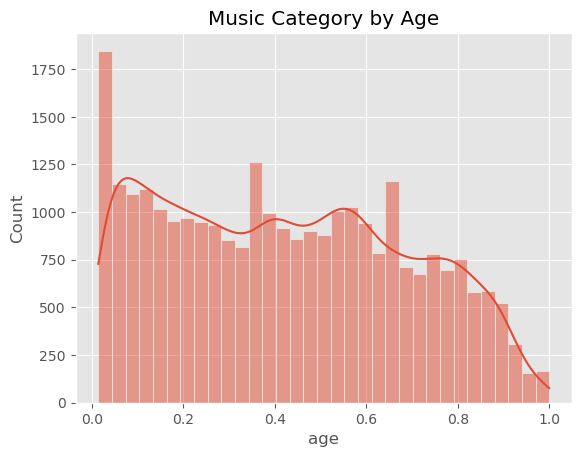

In [52]:
# Using a histograph to display the 'age' column to view the music by age.
sns.histplot(data=df, x="age", kde=True).set_title("Music Category by Age")

/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Music by Topic')

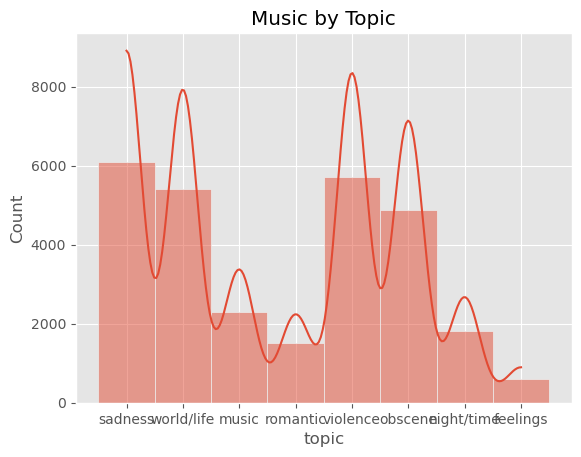

In [54]:
sns.histplot(data=df, x="topic", kde=True).set_title("Music by Topic")

In [35]:
release_date = df.value_counts("release_date")
# df.set_index("release_date").value_counts
df.head(30)

,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,frankie laine,i believe,1950,pop,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,johnnie ray,cry,1950,pop,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,pérez prado,patricia,1950,pop,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
5,perry como,round and round (with mitchell ayres and his o...,1950,pop,0.001053,0.420685,0.001053,0.074078,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.001053,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.000000
6,freestyle,opm medley: when i met you,1950,pop,0.000483,0.000483,0.371817,0.040712,0.000483,0.000483,0.000483,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.000000
7,johnny mathis,it's not for me to say,1950,pop,0.002506,0.002506,0.336056,0.002506,0.002506,0.002506,0.176861,0.002506,0.002506,0.002506,0.002506,0.386887,0.002506,0.002506,0.062602,0.002506,0.379400,0.529421,0.925703,0.000072,0.373454,0.192167,world/life,1.000000
8,stélios kazantzídis,klapse me mana klapse me,1950,pop,0.083537,0.002024,0.002024,0.248273,0.002024,0.002024,0.401801,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,0.496372,0.666180,0.974900,0.000014,0.621805,0.400382,romantic,1.000000
9,stélios kazantzídis,finito la mouzika,1950,pop,0.001120,0.102548,0.001120,0.053944,0.001120,0.001120,0.001120,0.091572,0.001120,0.001120,0.105752,0.001120,0.001120,0.001120,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.000000


In [36]:
df.head()

,artist_name,track_name,release_date,genre,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [37]:
new_df = df.to_csv("../data/cleaned_music_data.csv")